<a href="https://colab.research.google.com/github/DavidAshraf/Logo-Classifier/blob/master/Logo_Classifier.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
!pip install pillow==4.1.1
!pip install torchvision

    100% |████████████████████████████████| 5.7MB 6.0MB/s 
  Found existing installation: Pillow 4.0.0
    Uninstalling Pillow-4.0.0:
      Successfully uninstalled Pillow-4.0.0
    100% |████████████████████████████████| 61kB 2.9MB/s 
    100% |████████████████████████████████| 591.8MB 28kB/s 
tcmalloc: large alloc 1073750016 bytes == 0x627aa000 @  0x7f28cbda22a4 0x591a07 0x5b5d56 0x502e9a 0x506859 0x502209 0x502f3d 0x506859 0x504c28 0x502540 0x502f3d 0x506859 0x504c28 0x502540 0x502f3d 0x506859 0x504c28 0x502540 0x502f3d 0x507641 0x502209 0x502f3d 0x506859 0x504c28 0x502540 0x502f3d 0x507641 0x504c28 0x502540 0x502f3d 0x507641


In [2]:
from google.colab import drive
drive.mount('/content/drive', force_remount=True)
drive_root = '/content/drive/My Drive/Logo-Classifier/'


Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3Aietf%3Awg%3Aoauth%3A2.0%3Aoob&scope=email%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdocs.test%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdrive%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdrive.photos.readonly%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fpeopleapi.readonly&response_type=code

Enter your authorization code:
··········
Mounted at /content/drive


To be able to import util we temporarily change the directory to drive_root

In [3]:
cd {drive_root}

/content/drive/My Drive/Logo-Classifier


In [0]:
from torchvision import transforms, models, datasets
import torch
import numpy as np 
import matplotlib.pyplot as plt
from util.cutout import Cutout
from PIL import Image

Then back to original

In [5]:
cd /content

/content


In [6]:
#Download data
root = 'http://www.multimedia-computing.de/flickrlogos/data/'
flickr47_train = root + 'FlickrLogos-32_dataset_v2.zip'
!wget {flickr47_train}
!unzip FlickrLogos-32_dataset_v2.zip
!ls


--2019-01-05 10:25:26--  http://www.multimedia-computing.de/flickrlogos/data/FlickrLogos-32_dataset_v2.zip
Resolving www.multimedia-computing.de (www.multimedia-computing.de)... 137.250.173.18
Connecting to www.multimedia-computing.de (www.multimedia-computing.de)|137.250.173.18|:80... connected.
HTTP request sent, awaiting response... 200 OK
Length: 3363984300 (3.1G) [application/zip]
Saving to: ‘FlickrLogos-32_dataset_v2.zip’

FlickrLogos-32_data 100%[===================>]   3.13G  7.29MB/s    in 7m 27s  

2019-01-05 10:32:54 (7.17 MB/s) - ‘FlickrLogos-32_dataset_v2.zip’ saved [3363984300/3363984300]

Archive:  FlickrLogos-32_dataset_v2.zip
   creating: FlickrLogos-v2/
  inflating: FlickrLogos-v2/all.filenames.txt  
  inflating: FlickrLogos-v2/all.relpaths.txt  
  inflating: FlickrLogos-v2/all.spaces.txt  
  inflating: FlickrLogos-v2/all.txt  
   creating: FlickrLogos-v2/classes/
   creating: FlickrLogos-v2/classes/jpg/
   creating: FlickrLogos-v2/classes/jpg/adidas/
  inflating: Fli

In [7]:
!ls FlickrLogos-v2/classes/jpg

adidas	carlsberg  erdinger  fosters   milka	 rittersport   texaco
aldi	chimay	   esso      google    no-logo	 shell	       tsingtao
apple	cocacola   fedex     guiness   nvidia	 singha        ups
becks	corona	   ferrari   heineken  paulaner  starbucks
bmw	dhl	   ford      HP        pepsi	 stellaartois


In [0]:
normalize = transforms.Normalize([0.485, 0.456, 0.406], [0.229, 0.224, 0.225])
ctout = Cutout(1,16)
train_transforms = transforms.Compose([transforms.RandomResizedCrop(224),
                                       transforms.ColorJitter(saturation=0.3),
                                      transforms.RandomRotation(30),
                                      transforms.RandomHorizontalFlip(),
                                      transforms.ToTensor(),
                                      normalize,
                                      ctout])

valid_transforms = transforms.Compose([transforms.Resize(255),
                                      transforms.CenterCrop(224),
                                      transforms.ToTensor(),
                                      normalize])

In [9]:
dataset =  datasets.ImageFolder('FlickrLogos-v2/classes/jpg', transform=train_transforms)
trainset = datasets.ImageFolder('FlickrLogos-v2/classes/jpg', transform=train_transforms)
validset = datasets.ImageFolder('FlickrLogos-v2/classes/jpg', transform=valid_transforms)
testset = datasets.ImageFolder('FlickrLogos-v2/classes/jpg', transform=valid_transforms)


# Shuffling and Splitting Dataset
np.random.seed(0)
torch.manual_seed(0)
dataset_size = len(dataset)
train_split= 0.8
validate_split = 0.1
test_split = 0.1
train_size = int(train_split * dataset_size)
validation_size = int(validate_split * dataset_size)
test_size = int(dataset_size - train_size - validation_size)


indices = list(range(dataset_size))
np.random.shuffle(indices)
train_indices = indices[:train_size]
temp = int(train_size+validation_size)
val_indices = indices[train_size:temp]
test_indices = indices[temp:]

print("Full set size:", len(trainset))

trainset = torch.utils.data.Subset(trainset, train_indices)
validset = torch.utils.data.Subset(validset, val_indices)
testset = torch.utils.data.Subset(testset, test_indices)

print("Train set size:", len(trainset))
print("Valid set size:", len(validset))
print("Test set size:", len(testset))

batch_size = 512
trainloader = torch.utils.data.DataLoader(trainset, batch_size=batch_size, shuffle=True)
validloader = torch.utils.data.DataLoader(validset, batch_size=64)
testloader = torch.utils.data.DataLoader(testset, batch_size=64)

Full set size: 8240
Train set size: 6592
Valid set size: 824
Test set size: 824


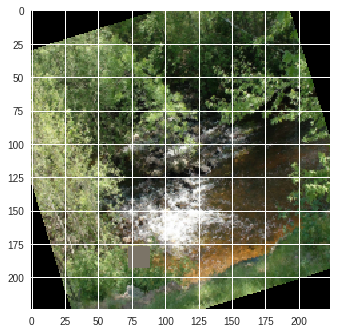

In [10]:
def imshow(image, ax=None, title=None):
    """Imshow for Tensor."""
    if ax is None:
        fig, ax = plt.subplots()
    
    # PyTorch tensors assume the color channel is the first dimension
    # but matplotlib assumes is the third dimension
    image = image.numpy().transpose((1, 2, 0))
    
    # Undo preprocessing
    mean = np.array([0.485, 0.456, 0.406])
    std = np.array([0.229, 0.224, 0.225])
    image = std * image + mean
    
    # Image needs to be clipped between 0 and 1 or it looks like noise when displayed
    image = np.clip(image, 0, 1)
    
    ax.imshow(image)
    
    return ax
  
im, l = next(iter(trainloader))
i = im[1]
imshow(i)

In [11]:
classifier = torch.nn.Sequential(torch.nn.Linear(2048, 1024),
                                 torch.nn.ReLU(),
                                 torch.nn.Dropout(p=0.3),
                                 torch.nn.Linear(1024, 512),
                                 torch.nn.ReLU(),
                                 torch.nn.Dropout(p=0.3),
                                 torch.nn.Linear(512, 33),
                                 torch.nn.LogSoftmax(dim=1))

model = models.resnet152(pretrained=True)
# Freezing Parameters
for parameter in model.parameters():
    parameter.requires_grad = False
    
# Replacing the classifier layer
model.fc = classifier

criterion = torch.nn.NLLLoss()
lr =0.001
optimizer = torch.optim.Adam(model.parameters(), lr=lr)

Downloading: "https://download.pytorch.org/models/resnet152-b121ed2d.pth" to /root/.torch/models/resnet152-b121ed2d.pth
100%|██████████| 241530880/241530880 [00:03<00:00, 78302366.47it/s]


In [0]:
weight_decay=0.25

In [0]:
def reduce_lr(optimizer,lr):
  for param_group in optimizer.param_groups:
    param_group['lr'] = lr

In [0]:
def convert_to_adamw(weight_decay):
  for group in optimizer.param_groups:
    for param in group['params']:
        param.data = param.data.add(-weight_decay * group['lr'], param.data)

In [0]:
# Training

def train(model, criterion, optimizer, scheduler, start_epoch, epochs, cp, cp_path,lr,best=np.Inf,last_epoch=-1):
  model.to('cuda')
  min_validation_loss = best
  train_losses_list = []
  valid_losses_list = []
  last_saved_epoch = last_epoch
  for e in range(start_epoch, epochs):
    
    train_losses = 0
    train_accuracy = 0
    validation_losses = 0
    validation_accuracy = 0
#     scheduler.step()
    model.train()

    for images, labels in trainloader:
      images, labels = images.to('cuda'), labels.to('cuda')

      optimizer.zero_grad()
      log_ps = model(images)
      loss = criterion(log_ps, labels)

      loss.backward()
      convert_to_adamw(weight_decay)
      optimizer.step()
      train_losses += loss.item() * images.size(0)
      
      ps = torch.exp(log_ps)
      top_ps, top_class = ps.topk(1, dim=1)
      equal = top_class == labels.view(*top_class.shape)
      train_accuracy += torch.sum(equal.type(torch.FloatTensor))



    model.eval()  
    with torch.no_grad():  
      for images, labels in validloader:
        images, labels = images.to('cuda'), labels.to('cuda')

        log_ps = model(images)
        loss = criterion(log_ps, labels) 
        validation_losses += loss.item() * images.size(0)

        ps = torch.exp(log_ps)
        top_ps, top_class = ps.topk(1, dim=1)
        equal = top_class == labels.view(*top_class.shape)
        validation_accuracy += torch.sum(equal.type(torch.FloatTensor))

    train_losses_list.append(train_losses/len(trainloader.dataset))
    valid_losses_list.append(validation_losses/len(validloader.dataset))

    print("Epoch: {}\t Training Loss: {}\t Training Accuracy: {}\t Validation Loss: {}\t Validation Accuracy: {}\t".format(
         e+1,
         train_losses/len(trainloader.dataset),
         100*train_accuracy/len(trainloader.dataset),
         validation_losses/len(validloader.dataset),
         100*validation_accuracy/len(validloader.dataset)))

    if validation_losses <= min_validation_loss:
      min_validation_loss = validation_losses
      last_saved_epoch=e
      print("Saving Model")
      cp['state_dict'] = model.state_dict()
      cp['optimizer'] = optimizer.state_dict()
      cp['epochs'] = e+1
      cp['loss'] = validation_losses
      cp['accuracy'] = validation_accuracy
      torch.save(cp, cp_path)
    else:
      if last_saved_epoch != -1:
        if (e-last_saved_epoch) % 2 == 0:
          lr = lr * 0.7
          reduce_lr(optimizer,lr)
          print('Learning rate reduced to :{:.8f}'.format(lr))

  
  plt.plot(train_losses_list, label='T')
  plt.plot(valid_losses_list, label='V')
  plt.legend(frameon=False)

In [0]:
cp = {'class_to_idx':dataset.class_to_idx,
      'model':models.resnet152(pretrained=True),
      'classifier':classifier,
      'batch_size':batch_size}
cp_path = drive_root + 'aug_cutout2.pt'

model.class_to_idx = dataset.class_to_idx

Epoch: 1	 Training Loss: 1.631135506537354	 Training Accuracy: 67.08131408691406	 Validation Loss: 1.1034729978413258	 Validation Accuracy: 75.48543548583984	
Saving Model
Epoch: 2	 Training Loss: 1.1776052667099295	 Training Accuracy: 72.66383361816406	 Validation Loss: 0.9936070893574687	 Validation Accuracy: 77.18446350097656	
Saving Model
Epoch: 3	 Training Loss: 1.1070022484631215	 Training Accuracy: 73.68022155761719	 Validation Loss: 0.8736390662424772	 Validation Accuracy: 76.82038879394531	
Saving Model
Epoch: 4	 Training Loss: 1.0375654963613714	 Training Accuracy: 74.02912902832031	 Validation Loss: 0.812930784179169	 Validation Accuracy: 76.9417495727539	
Saving Model
Epoch: 5	 Training Loss: 0.9545426889530664	 Training Accuracy: 75.42475891113281	 Validation Loss: 0.7909483492953105	 Validation Accuracy: 80.46116638183594	
Saving Model
Epoch: 6	 Training Loss: 0.8872788282274042	 Training Accuracy: 77.12378692626953	 Validation Loss: 0.6638297484916391	 Validation Accurac

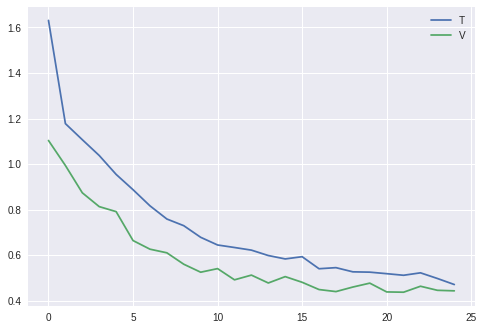

In [17]:
train(model, criterion, optimizer, None, 0, 25, cp, cp_path,lr=lr)

Epoch: 26	 Training Loss: 0.5755688918447032	 Training Accuracy: 85.23968505859375	 Validation Loss: 0.7095848194603781	 Validation Accuracy: 83.85922241210938	
Learning rate reduced to :0.00007000
Epoch: 27	 Training Loss: 0.4302511747600963	 Training Accuracy: 89.19902801513672	 Validation Loss: 0.3302688561018231	 Validation Accuracy: 90.53398132324219	
Saving Model
Epoch: 28	 Training Loss: 0.35751417394980645	 Training Accuracy: 90.56432342529297	 Validation Loss: 0.27356776768721425	 Validation Accuracy: 91.62621307373047	
Saving Model
Epoch: 29	 Training Loss: 0.334084382913645	 Training Accuracy: 91.30764770507812	 Validation Loss: 0.24594227607967784	 Validation Accuracy: 93.44660186767578	
Saving Model
Epoch: 30	 Training Loss: 0.3029957729057201	 Training Accuracy: 92.27851867675781	 Validation Loss: 0.23797592115633695	 Validation Accuracy: 93.56796264648438	
Saving Model
Epoch: 31	 Training Loss: 0.2792179940394985	 Training Accuracy: 92.64259338378906	 Validation Loss: 0.

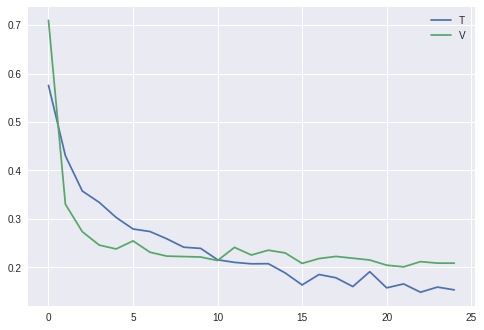

In [18]:
checkpoint = torch.load(cp_path)
model.load_state_dict(checkpoint['state_dict'])
best_loss = np.min(np.array(checkpoint['loss']))
last_epoch=checkpoint['epochs']-1
list_children = list(model.children())[:-3]
optimizer.load_state_dict(checkpoint['optimizer'])
#unfreezing all layers
for param in model.parameters():
  param.requires_grad=True
#freezing all layers but the last 3 layers
for child in list_children:
  for param in child.parameters():
    param.requires_grad=False
train(model, criterion, optimizer, None, 25, 50, checkpoint, cp_path,lr=lr*0.1,best=best_loss,last_epoch=last_epoch)

In [0]:
resize_size=255
image_size=224
mean= np.array([0.485, 0.456, 0.406])
std = np.array([0.229, 0.224, 0.225])

In [0]:
def process_image(image_path):
    ''' Scales, crops, and normalizes a PIL image for a PyTorch model,
        returns an Numpy array
    '''
    image=Image.open(image_path)
    # TODO: Process a PIL image for use in a PyTorch model
    if image.size[0] > image.size[1]:
       image.thumbnail((10000000,resize_size))
    else:
       image.thumbnail((resize_size,10000000))
    width=image.size[0]
    height=image.size[1]
    left = (width-image_size)/2
    top = (height-image_size)/2
    right = (width+image_size)/2
    bottom = (height+image_size)/2
    image = image.crop((left,top,right,bottom))
    image_np = np.array(image)/255
    mean_array=np.array(mean)
    std_array=np.array(std)
    image_np = (image_np-mean_array)/std_array
    image_np = image_np.transpose((2,0,1))
    return torch.from_numpy(image_np)

In [0]:
def predict(image_path, model, topk=5):
    ''' Predict the class (or classes) of an image using a trained deep learning model.
    '''
    
    # TODO: Implement the code to predict the class from an image file
    img = process_image(image_path)
    img.unsqueeze_(0)
    img=img.float()
    with torch.no_grad():
      model.eval()
      log_ps=model(img)
      ps = torch.exp(log_ps)
      preds,classes = ps.topk(topk,dim=1)
      return preds,classes

In [0]:
def show_preds(image_path,model):
  img=process_image(image_path)
  preds,classes=predict(image_path,model)
  preds,classes=preds.numpy(),classes.numpy()
  _,(ax1,ax2)=plt.subplots(2,1)
  imshow(img,ax=ax1)
  l1=[]
  classes_list=list(classes.squeeze())
  for class1 in classes_list:
    l1.append(idx_to_class[class1])
  preds=preds.squeeze()
  classes=np.array(l1)
  ax2.barh(np.arange(5),preds,color='b',tick_label=classes)
  ax2.invert_yaxis()

In [0]:
def calculate_accuracy(model):
  i=0
  model.to('cuda')
  with torch.no_grad():
    model.eval()
    accuracy_test=0
    for images_test,labels_test in testloader:
      images_test,labels_test=images_test.to('cuda'),labels_test.to('cuda')
      i +=1
      print(i)
      log_ps_test = model(images_test)
      ps_test=torch.exp(log_ps_test)
      preds,classes = torch.max(ps_test,dim=1)
      accuracy_test += torch.sum(torch.eq(labels_test,classes))
    accuracy_test = accuracy_test.item()/len(testloader.dataset)
  return accuracy_test

In [24]:
checkpoint = torch.load(cp_path)
model.load_state_dict(checkpoint['state_dict'])
model.class_to_idx = checkpoint['class_to_idx']
calculate_accuracy(model)

1
2
3
4
5
6
7
8
9
10
11
12
13


0.9550970873786407

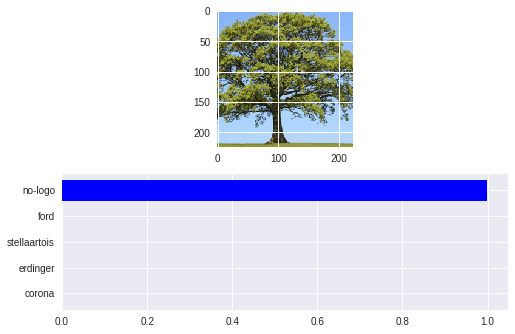

In [26]:

idx_to_class ={}
for key,value in model.class_to_idx.items():
  idx_to_class[value]=key
model.to('cpu')
show_preds(drive_root+'/google test/tree.jpg',model)

In [58]:
ls {drive_root/'google test'}

ls: cannot access '{drive_root/google test}': No such file or directory
